In [1]:
import matplotlib.pyplot as plt
from src.core.LangevinGillespie import LangevinGillespie

In [2]:
r = 19  # nm - distance from the rotational axis to the center of the sphere
a = 20  # nm - radius of a sphere (See https://en.wikipedia.org/wiki/Stokes_flow)
eta = 1e-9  # pN.s/nm^2

LG = LangevinGillespie()
LG.steps = 1000
LG.dt = 1e-6
LG.kappa = 56
LG.kBT = 4.14
LG.gammaB = LG.computeGammaB(a, r, eta)
LG.method = "heun"

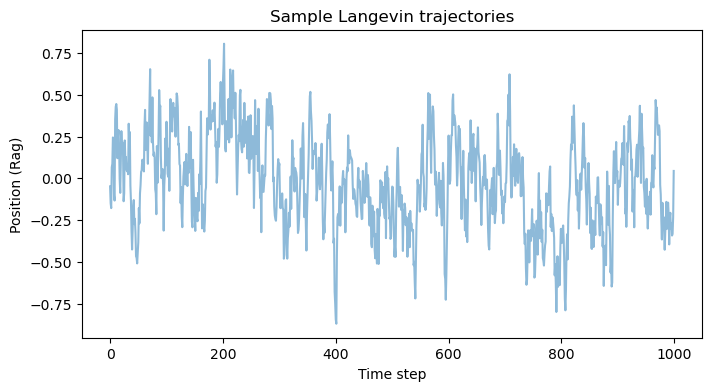

In [3]:
SIM_ANGLE = 0
TARGET_ANGLE = SIM_ANGLE

LG.theta_0 = LG.initializeTheta(SIM_ANGLE)
LG.theta_i = TARGET_ANGLE

plt.figure(figsize=(8, 4))
for i in range(0, 1):
    simulation_data = LG.simulate()
    plt.plot(simulation_data[:], alpha=0.50)


plt.xlabel("Time step")
plt.ylabel("Position (Rag)")
plt.title("Sample Langevin trajectories");

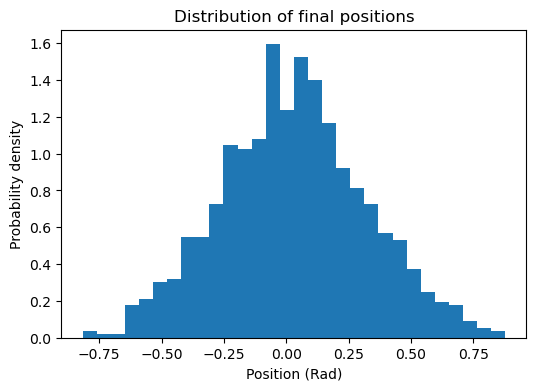

In [4]:
plt.figure(figsize=(6, 4))
plt.hist(LG.simulate(), bins=30, density=True)
plt.xlabel("Position (Rad)")
plt.ylabel("Probability density")
plt.title("Distribution of final positions");

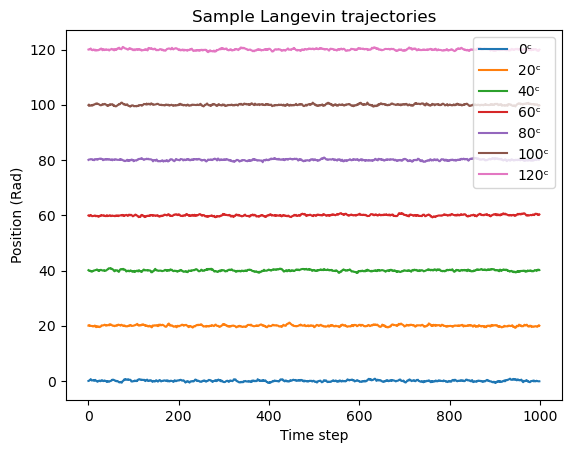

In [5]:
for angle in range(0, 121, 20):
    LG.theta_0 = LG.initializeTheta(angle)
    LG.theta_i = angle
    simulation_data = LG.simulate()
    plt.plot(simulation_data[:], alpha=1, label=f"{angle}ᶜ")

plt.xlabel("Time step")
plt.ylabel("Position (Rad)")
plt.title("Sample Langevin trajectories")
plt.legend();